 **Apriori-based association mining on one-hot transaction data.**

In [18]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, Markdown

In [4]:
# Load the Online Retail workbook into a DataFrame
data = pd.read_excel("/content/Online retail.xlsx")
data


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [5]:
# Quick peek at the raw table structure
print("Sample of raw records:\n", data.head())

Sample of raw records:
   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                    

In [6]:
# Step 1: Break each comma-separated transaction string into a list of item names
# Here we assume the first column contains comma-separated product entries per transaction
transactions = data.iloc[:, 0].dropna().apply(lambda s: [itm.strip() for itm in str(s).split(',')])
print("\nExample transactions (first 3):")
print(transactions.head(3))


Example transactions (first 3):
0    [burgers, meatballs, eggs]
1                     [chutney]
2             [turkey, avocado]
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, dtype: object


In [7]:
# Step 2: Convert the list-of-lists into a binary (one-hot) matrix using TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

trans_encoder = TransactionEncoder()
encoded_array = trans_encoder.fit(transactions).transform(transactions)
encoded_array


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [8]:
onehot_df = pd.DataFrame(encoded_array, columns=trans_encoder.columns_)
onehot_df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Step 3: Run Apriori to obtain frequent itemsets with a modest support cutoff
freq_itemsets = apriori(onehot_df, min_support=0.005, use_colnames=True)

if freq_itemsets.empty:
    print(" No frequent itemsets found with the current support. Consider lowering min_support.")
else:
    assoc_rules = association_rules(freq_itemsets, metric="lift", min_threshold=1)
    assoc_rules = assoc_rules.sort_values("confidence", ascending=False)

    print("\nTop discovered association rules:")
    print(assoc_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



Top discovered association rules:
                         antecedents      consequents   support  confidence  \
1525       (soup, frozen vegetables)  (mineral water)  0.005067    0.633333   
1766               (olive oil, soup)  (mineral water)  0.005200    0.582090   
1507  (olive oil, frozen vegetables)  (mineral water)  0.006533    0.576471   
1724                    (milk, soup)  (mineral water)  0.008533    0.561404   
1194               (soup, chocolate)  (mineral water)  0.005600    0.552632   

          lift  
1525  2.658086  
1766  2.443017  
1507  2.419434  
1724  2.356198  
1194  2.319383  


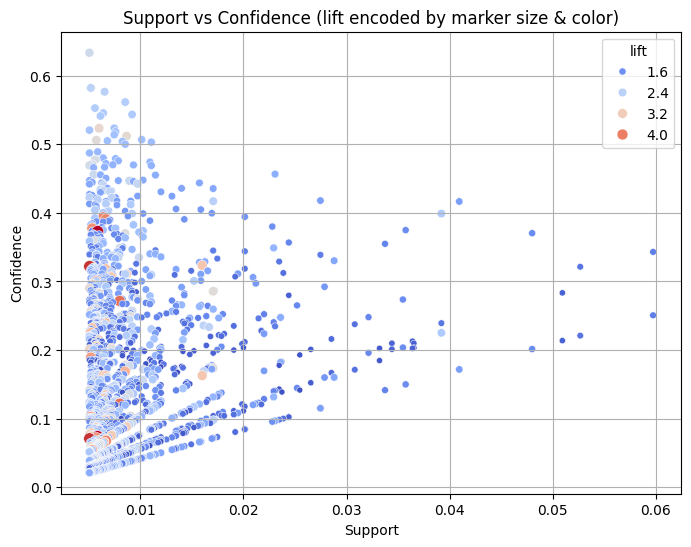

In [12]:
# Step 4: Plot support vs confidence; represent lift by point size and color
plt.figure(figsize=(8, 6))
sns.scatterplot(data=assoc_rules, x='support', y='confidence', size='lift', hue='lift', palette='coolwarm')
plt.title('Support vs Confidence (lift encoded by marker size & color)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

In [14]:
# Summarize the strongest rule for quick interpretation
best_rule = assoc_rules.iloc[0]
print(f"\n Key rule: If a buyer purchases {list(best_rule['antecedents'])}, they often also purchase {list(best_rule['consequents'])}.")
print(f"   - Confidence: {best_rule['confidence']:.2f}")
print(f"   - Lift: {best_rule['lift']:.2f}")



 Key rule: If a buyer purchases ['soup', 'frozen vegetables'], they often also purchase ['mineral water'].
   - Confidence: 0.63
   - Lift: 2.66


In [22]:
faq_markdown = """
Interview Q&A

**Q1: Define lift and its significance in association mining.**
**A1:** Lift measures how much more frequently two itemsets occur together than expected by chance.
A lift > 1 indicates a positive association; larger values imply stronger relationships.

**Q2: Define support and confidence; how are they computed?**
**A2:**
- **Support** = proportion of transactions containing the itemset.
- **Confidence** = support(A ∪ B) / support(A) — probability of B occurring when A is present.

**Q3: What are typical drawbacks of association rule mining?**
**A3:**
- Can produce an overwhelming number of rules, many trivial or unhelpful.
- Requires binary input (numerical fields must be transformed).
- Scalability issues when item vocabulary is very large.
- Ignores order/time; doesn't model sequential patterns.
"""


display(Markdown(faq_markdown))


Interview Q&A 

**Q1: Define lift and its significance in association mining.**  
**A1:** Lift measures how much more frequently two itemsets occur together than expected by chance.  
A lift > 1 indicates a positive association; larger values imply stronger relationships.

**Q2: Define support and confidence; how are they computed?**  
**A2:**  
- **Support** = proportion of transactions containing the itemset.  
- **Confidence** = support(A ∪ B) / support(A) — probability of B occurring when A is present.

**Q3: What are typical drawbacks of association rule mining?**  
**A3:**  
- Can produce an overwhelming number of rules, many trivial or unhelpful.  
- Requires binary input (numerical fields must be transformed).  
- Scalability issues when item vocabulary is very large.  
- Ignores order/time; doesn't model sequential patterns.
